In [1]:
import pandas as pd


In [3]:
dat = pd.read_csv('H-2-certification-decisions.csv')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,8,9,14,15,16,17,18,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dat.head()

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_state,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate
0,9455254,H-2B,2000,1999-10-01,"DENIED, TEMPORARY",1.0,0,False,NaN,NaN,...,CA,LOS ANGELES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8222219,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2.0,2,True,NaN,NaN,...,CO,BEAVER CREEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8222168,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2.0,2,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8222169,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",5.0,5,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8222170,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",40.0,40,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2a How many different visa_type ?

In [11]:


jip = dat['visa_type'].unique()

print(jip)

a = {}

a[jip[0]] = 0
a[jip[1]] = 0
for i in dat['visa_type']:
    if i == jip[0]:
        a[jip[0]] += 1
    if i == jip[1]:
        a[jip[1]] += 1
        
from collections import Counter
iep = Counter(dat['visa_type'])
print(iep)
print(a)

['H-2B' 'H-2A']
Counter({'H-2B': 122662, 'H-2A': 90493})
{'H-2B': 122662, 'H-2A': 90493}


2b how are date values represented?

In [13]:
print(dat['last_event_date'][0])

1999-10-01


2c I & II examine categories, and make simpler

In [15]:
Counter(dat['case_status'])

Counter({'CERTIFICATION': 17195,
         'CERTIFICATION EXPIRED': 355,
         'CERTIFIED': 42671,
         'CERTIFIED - FULL': 57044,
         'CERTIFIED - PARTIAL': 3120,
         'CERTIFIED, TEMPORARY': 36788,
         'DATA REVIEW': 3,
         'DENIED': 13684,
         'DENIED, TEMPORARY': 5817,
         'DETERMINATION ISSUED - CERTIFICATION': 18977,
         'DETERMINATION ISSUED - CERTIFICATION EXPIRED': 954,
         'DETERMINATION ISSUED - DENIED': 366,
         'DETERMINATION ISSUED - PARTIAL CERTIFICATION': 308,
         'DETERMINATION ISSUED - PARTIAL CERTIFICATION EXPIRED': 41,
         'DETERMINATION ISSUED - WITHDRAWN': 346,
         'FINAL REVIEW': 3,
         'INCOMPLETE': 320,
         'MODIFICATION': 48,
         'NOF ISSUED': 2,
         'PARTIAL CERTIFICATION': 2089,
         'PARTIAL CERTIFICATION EXPIRED': 84,
         'PARTIAL CERTIFIED': 8514,
         'RECEIVED': 110,
         'RECEIVED REGIONAL OFFICE': 980,
         'REDUCTION IN RECRUITMENT DENIED': 4,
  

2d calculate summary statistics for n_requested

Mean is  18.9165159138
Stdev is  42.5461154635
Kurt is  nan
Skew is  nan
Max is  1866.0
Min is  0.0


ValueError: max must be larger than min in range parameter.

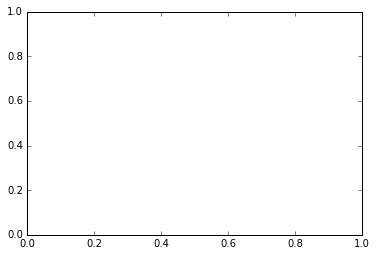

In [33]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
% matplotlib inline
print('Mean is ',dat['n_requested'].mean())
print('Stdev is ',np.std(dat['n_requested']))
print('Kurt is ',scipy.stats.kurtosis(dat['n_requested']))
print('Skew is ',scipy.stats.skew(dat['n_requested']))
print('Max is ',dat['n_requested'].max())
print('Min is ',dat['n_requested'].min())
plt.hist(dat['n_requested'],100)
plt.show()


Mean is  16.0536464075
Stdev is  39.1352709024
Kurt is  271.1751047795673
Skew is  11.73937695231197
Max is  1866
Min is  0


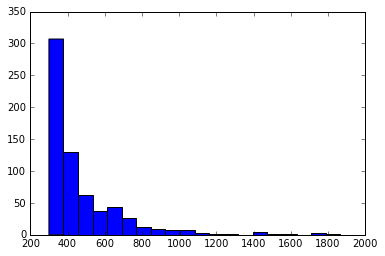

In [43]:
print('Mean is ',dat['n_certified'].mean())
print('Stdev is ',np.std(dat['n_certified']))
print('Kurt is ',scipy.stats.kurtosis(dat['n_certified']))
print('Skew is ',scipy.stats.skew(dat['n_certified']))
print('Max is ',dat['n_certified'].max())
print('Min is ',dat['n_certified'].min())
plt.hist(dat[dat['n_certified'] >= 300]['n_certified'],20)
plt.show()

In [45]:
len(Counter(dat['job_title']))

8753

In [ ]:
len(Counter(dat['organization_flag']))